In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [49]:
# reading the data
wheat_data = pd.read_csv(r"D:\Data Science\deep learning\assignment-2\wheat.csv")
#ris_data.head()
features = wheat_data.iloc[:,:-1]
label = wheat_data.iloc[:,-1:]

In [50]:
encoder = OneHotEncoder()
label=np.reshape(label, (label.shape[0], 1))
label= encoder.fit_transform(label).toarray()
#label = labelencoder_X.fit_transform(label)

C:\Users\kapil\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [51]:
x_train,x_test,y_train,y_test = train_test_split(features, label,test_size = 0.2)

In [52]:
# normalizing the data using mean and standard deviation of training data 
train_mean = x_train.mean(axis=0)
train_std = x_train.std(axis=0)
#print ((train_mean))
x_train = ((x_train - train_mean )/train_std*1.0)
x_test = ((x_test - train_mean)/train_std*1.0)

In [53]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train,test_size = 0.2)

In [54]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 7
        self.outputLayerSize = 3
        self.hiddenLayerSize_1 = 10
        self.hiddenLayerSize_2 = 10
        self.lr = 0.01
        
        #self.loss= 0
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize_1)
        self.W2 = np.random.randn(self.hiddenLayerSize_1, self.hiddenLayerSize_2)
        self.W3 = np.random.randn(self.hiddenLayerSize_2, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.sigmoid(self.z1)
        #self.a1 = np.vstack((bias,self.a1))
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.sigmoid(self.z2)
        #self.a2 = np.vstack((bias,self.a2))
        self.z3 = np.dot(self.a2, self.W3)
        self.y_hat= self.soft_max(self.z3.T)
        return 0
        
    def backward(self,X, Y):
         der_cost_z3 = self.y_hat.T - Y
         der_z3_w3 = self.a2 
         self.der_W3 = np.dot(der_z3_w3.T,der_cost_z3)
         self.der_W2 = np.dot((self.a1.T),(self.der_sigmoid(self.z2)*np.dot(der_cost_z3,self.W3.T)))   
         #print (der_cost_z3.shape)
         der_z1_dw1 = X
         der_cost_a2 = np.dot(der_cost_z3,self.W3.T)
         der_z2 = self.der_sigmoid(self.z2)
         der_z1 = self.der_sigmoid(self.z1)
         der_z2_a1 = self.W2
         inter = ((der_cost_a2)*(der_z2 * np.dot(der_z1,der_z2_a1)))
         self.der_W1 = np.dot(der_z1_dw1.T,inter)
         #print (der_cost_a2.shape,(der_z2 * np.dot(der_z1,der_z2_a1)).shape)
         return (0)
        
    def sigmoid(self,z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))    
    
    def der_sigmoid(self, z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    def soft_max(self,z):
        #Apply soft max activation function to scalar, vector, or matrix
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def cost_function(self,X,actual_label):
        self.forward(X)
        self.cost = 0
        for x,y in zip(actual_label,self.y_hat.T):
            self.cost += np.sum(x*np.log(y))
        return (-1*self.cost)
   
    def update_weights(self):  
        self.W1 -= self.lr*self.der_W1
        self.W2 -= self.lr*self.der_W2
        self.W3 -= self.lr*self.der_W3
    
    def evaluate (self,X,Y):
        nn.forward(X)
        accuracy = 0
        cost = 0
        pred_label = []
        for i in nn.y_hat.T:
                max_value = np.max(i)
                pred_label.append(list(np.where(i==max_value,1,0)))

        count = 0
        for i,j in zip(y_val,pred_label):
                if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
                    count +=1

        accuracy = ((count/x_val.shape[0])*100)
        cost = (nn.cost_function(X,Y))
        return (accuracy,cost)
        

In [67]:
accuracy = []
cost = []
val_accuracy = []
val_cost = []
nn = Neural_Network()
for epoch_number in range(1000):
    cost.append(nn.cost_function(x_train,y_train))
    pred_label = []
    for i in nn.y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))

    count = 0
    for i,j in zip(y_train,pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            count +=1
    accuracy.append((count/y_train.shape[0])*100)
    nn.backward(x_train,y_train)
    nn.update_weights()
    temp = nn.evaluate(x_val,y_val)
    val_accuracy.append(temp[0])
    val_cost.append(temp[1])

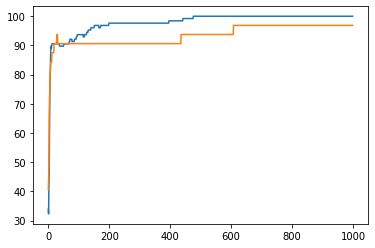

In [69]:
import matplotlib.pyplot as plt
plt.plot(range(1000),accuracy)
plt.plot(range(1000),val_accuracy)
plt.show()

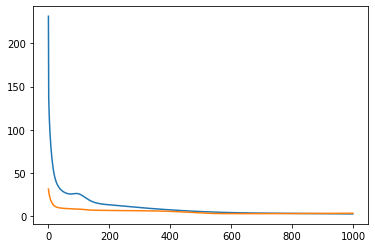

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(1000),cost)
plt.plot(range(1000),val_cost)
plt.show()

In [73]:
X_train,Y_train = np.concatenate([x_train,x_val]),np.concatenate([y_train,y_val])

In [82]:

accuracy = []
cost = []
val_accuracy = []
val_cost = []
nn = Neural_Network()
for epoch_number in range(400):
    cost.append(nn.cost_function(X_train,Y_train))
    pred_label = []
    for i in nn.y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))

    count = 0
    for i,j in zip(y_train,pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            count +=1
    accuracy.append((count/y_train.shape[0])*100)
    nn.backward(X_train,Y_train)
    nn.update_weights()
print ("accuracy")
print (accuracy[-1])
print ("loss")
print (cost[-1])

accuracy
96.8503937007874
loss
9.788982288882657


In [83]:
# for test set
nn.forward(x_test)
accuracy = []
cost = 0
pred_label = []
for i in nn.y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))

count = 0
for i,j in zip(y_test,pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            count +=1

accuracy = ((count/x_test.shape[0])*100)
print (y_test.shape[0])
cost = (nn.cost_function(x_test,y_test))
print (count)
print (accuracy)
print (cost)

40
37
92.5
3.961095160307607


In [ ]:
#run this line to save your model
#np.save(r"D:\Data Science\deep learning\assignment-2\model-2", [nn.W1,nn.W2,nn.W3])

In [115]:
# load model and make prediction on test set
model = np.load(r"D:\Data Science\deep learning\assignment-2\model-2.npy",  allow_pickle=True)
w1 = model[0]
w2 = model[1]
w3 = model[2]
#Propagate inputs though network
def sigmoid(z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
def soft_max(z):
        #Apply soft max activation function to scalar, vector, or matrix
        return np.exp(z) / np.sum(np.exp(z), axis=0)    
def evaluate_test(X):
    z1 = np.dot(X, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3)
    y_hat= soft_max(z3.T)
    return (y_hat)
y_hat = evaluate_test(x_test)
accuracy = []
cost = 0
pred_label = []
for i in y_hat.T:
        max_value = np.max(i)
        pred_label.append(list(np.where(i==max_value,1,0)))

count = 0
for i,j in zip(y_test,pred_label):
        if ((i[0] == j[0]) & (i[1] == j[1]) & (i[2] == j[2])):
            count +=1

accuracy = ((count/x_test.shape[0])*100)
cost = (nn.cost_function(x_test,y_test))

print ("accuracy is",accuracy)
print ("loss is ",cost)
        

accuracy is 92.5
loss is  3.961095160307607
